More information about the dataset can be found [here](https://www.kaggle.com/datasets/mirichoi0218/insurance).

# Import libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split, cross_validate

## Import models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor


#meterics
from sklearn.metrics import mean_squared_error, r2_score


# import feature_engine.transformation as vt
from feature_engine.transformation import LogTransformer

from feature_engine.discretisation import ArbitraryDiscretiser
from feature_engine.encoding import OneHotEncoder 

from sklearn.pipeline import Pipeline


# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load dataset
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Analysis

In [3]:
data.info()
# data has 7 columns and  1338 rows and no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Visualization
## Identyfying variables type


In [5]:
# Categorical variables
cate_var = [var for var in data.columns if data[var].dtype=='O'] 
cate_var

['sex', 'smoker', 'region']

In [6]:
# numerical variables
numr_var = [var for var in data.columns if data[var].dtype!='O' and var != 'charges']
numr_var

['age', 'bmi', 'children']

## Visualizing the relationship between features and target 

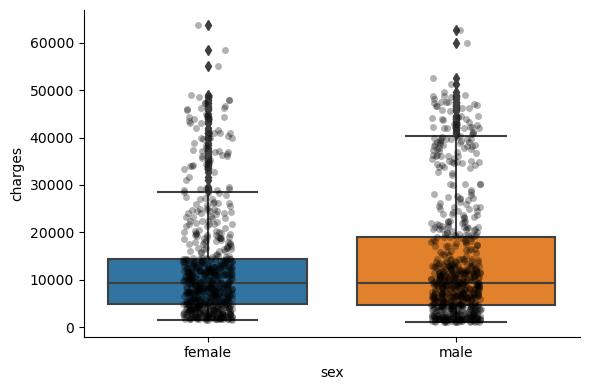

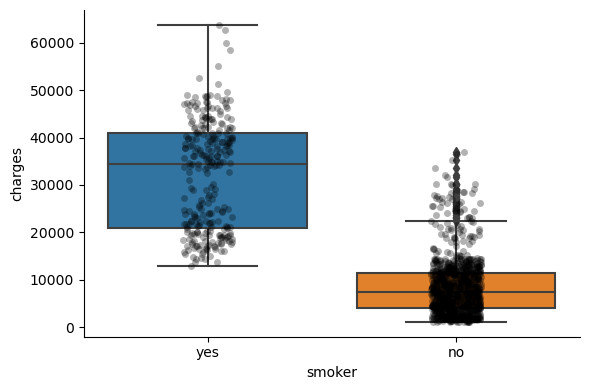

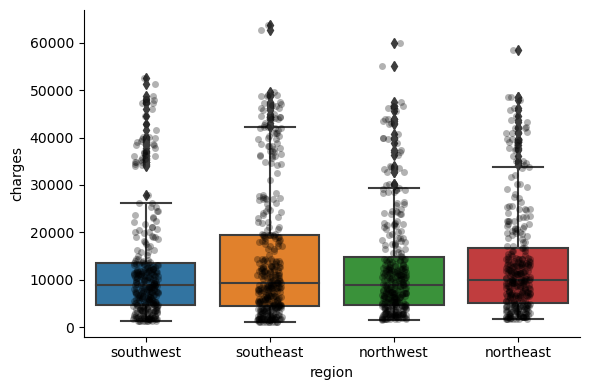

In [7]:
# Categorical variables

for var in cate_var:
    # make boxplot with Catplot
    sns.catplot(x=var, y='charges', data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='charges', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

There seems to be a diference in the mean charges between smoker and nonsmoker. "Gender" and "region" do not show any differnce.

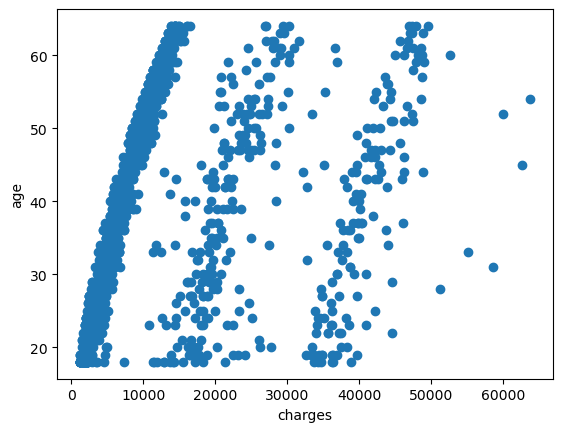

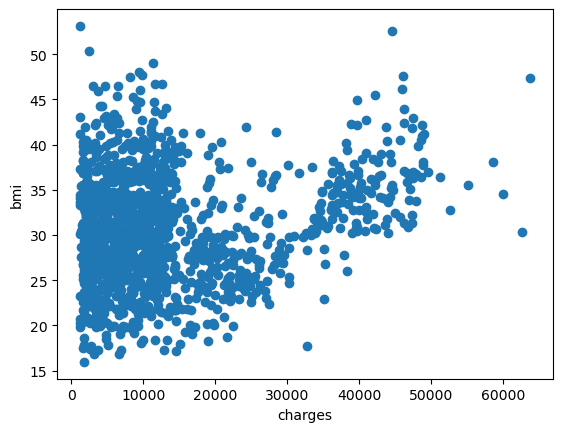

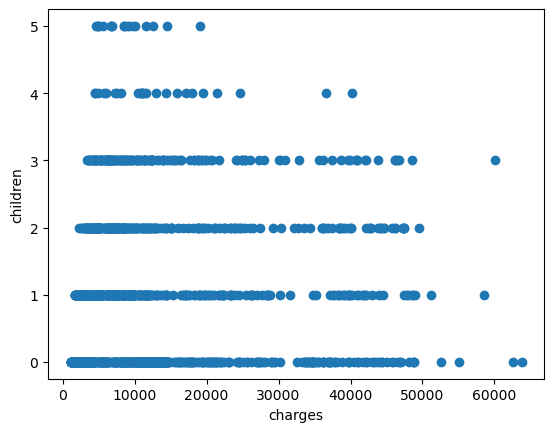

In [8]:
# numerical variables

for var in numr_var:
    plt.scatter(data['charges'], data[var])
    plt.xlabel('charges')
    plt.ylabel(var)

    plt.show()

# Data Analysis
## Tareget analysis


In [9]:
# plot the histograms to check the variables distribution
# histogram and Q-Q plots

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

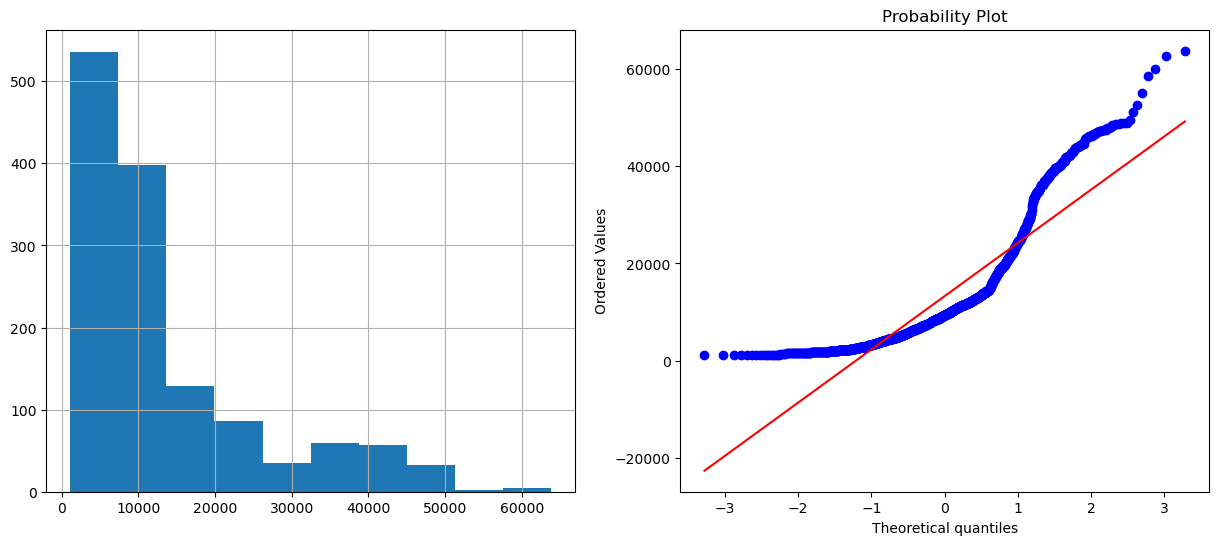

In [10]:
diagnostic_plots(data, 'charges')

The target is heavily right skewed. Will apply log-transformation.

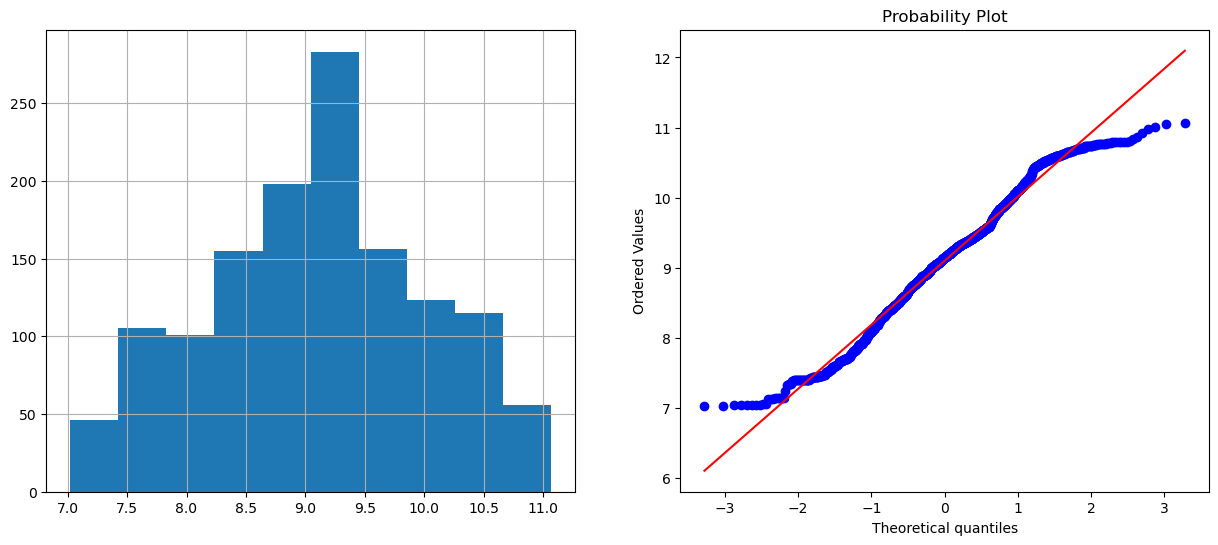

In [11]:

# import feature_engine.transformation as vt
from feature_engine.transformation import LogTransformer

# LogTransformer
lt = LogTransformer(variables = ['charges'])
lt.fit(data)
data = lt.transform(data)

diagnostic_plots(data, 'charges')

## Features analysis

In [12]:
discrete_vars = [var for var in data.columns  if len(data[var].unique()) < 10 ]
discrete_vars

encoding_var = [var for var in data.columns if data[var].dtype=='O'] 
encoding_var


['sex', 'smoker', 'region']

### BMI

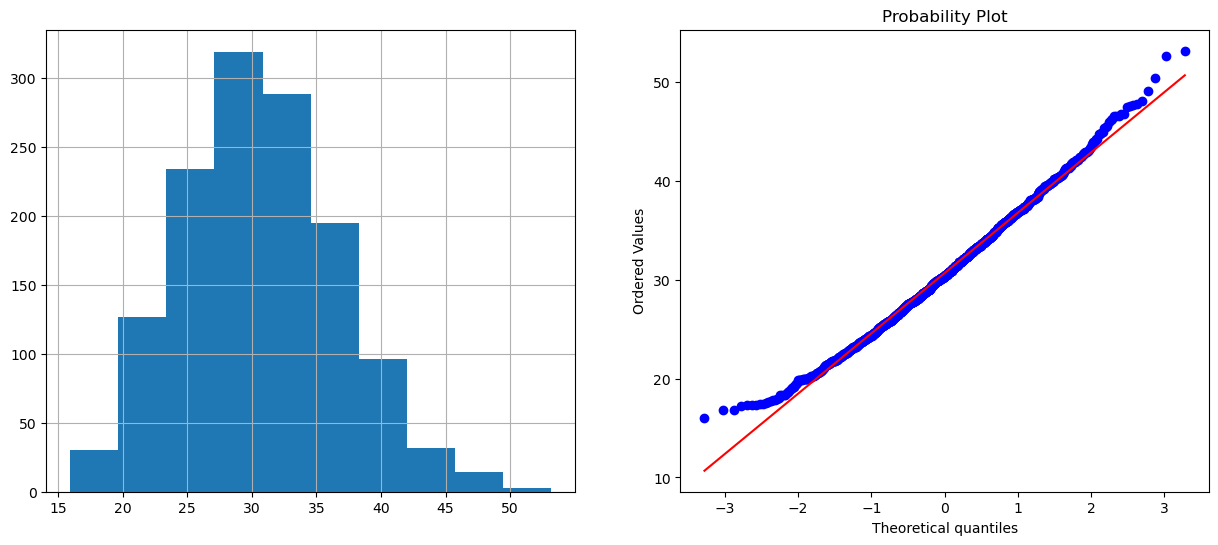

In [13]:

diagnostic_plots(data, 'bmi')

#### Log transformation

### Age

The transformation will not help. Will try Discretisation and check the features importance

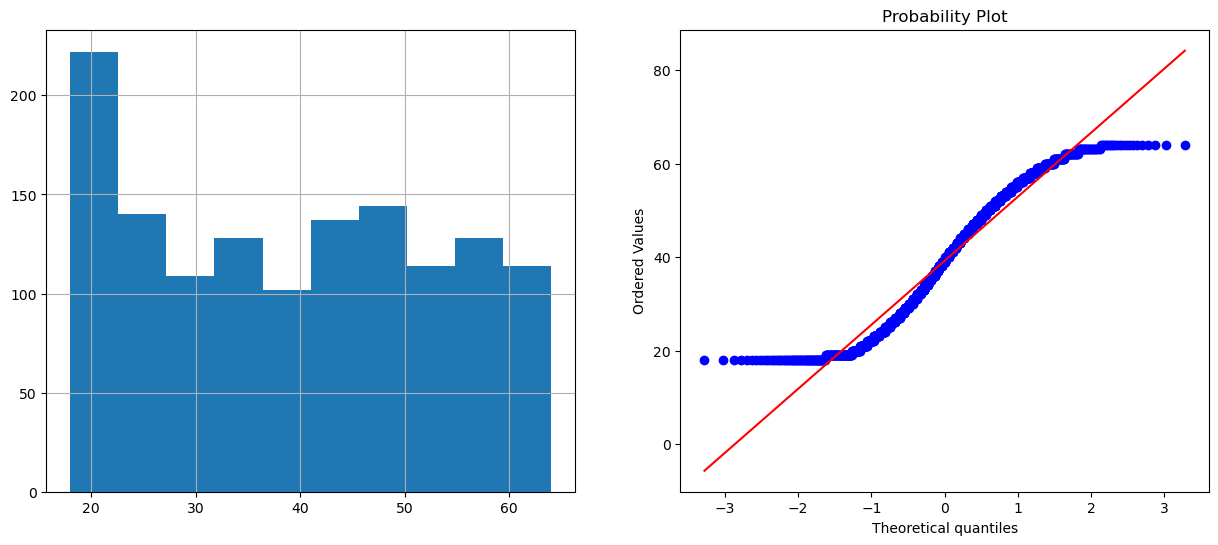

In [14]:
diagnostic_plots(data, 'age')

The transformation will not help. Will try Discretisation for 'age'.

#### EqualFrequencyDiscretiser

Text(0, 0.5, 'mean of charges')

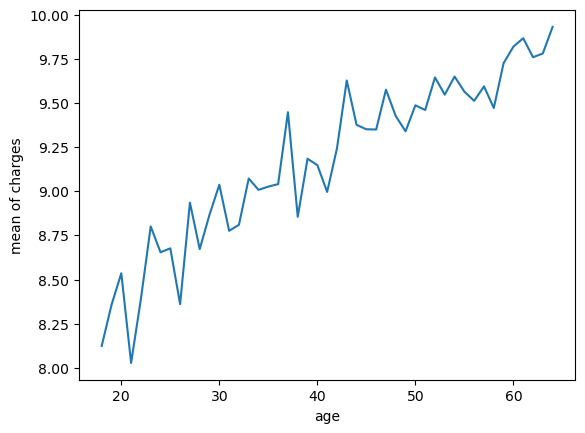

In [15]:
# let's explore if the age have a linear relationship with the target:

pd.concat([data], axis=1).groupby('age')['charges'].mean().plot()
plt.ylabel('mean of charges')

In [16]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

data['age_t'] = data['age'] ## copy the variable under new name


# let's explore age relationship with the target
# with the target:
disc = EqualFrequencyDiscretiser(q=5, variables=['age_t'], return_object= True)
disc.fit(data)
data= disc.transform(data)
data.head()

,age,sex,bmi,children,smoker,region,charges,age_t
0,19,female,27.900,0,yes,southwest,9.734176,0
1,18,male,33.770,1,no,southeast,7.453302,0
2,28,male,33.000,3,no,southeast,8.400538,1
3,33,male,22.705,0,no,northwest,9.998092,1
4,32,male,28.880,0,no,northwest,8.260197,1


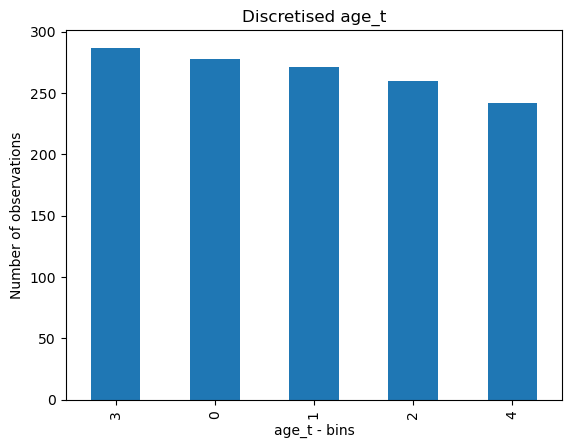

In [17]:
data['age_t'].value_counts().plot.bar()
plt.xlabel('age_t - bins')
plt.ylabel('Number of observations')
plt.title('Discretised age_t')
plt.show()

Text(0, 0.5, 'mean of charges')

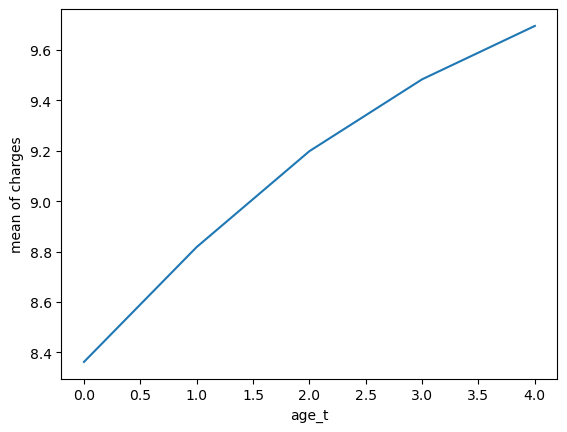

In [18]:
# let's explore if the bins have a linear relationship with the target:

pd.concat([data], axis=1).groupby('age_t')['charges'].mean().plot()
plt.ylabel('mean of charges')

In [19]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges,age_t
0,19,female,27.90,0,yes,southwest,9.734176,0
1,18,male,33.77,1,no,southeast,7.453302,0
2,28,male,33.00,3,no,southeast,8.400538,1


## Mapping categorical variables



In [20]:
encoding_var = ['sex', 'smoker', 'region'] 
encoding_var

['sex', 'smoker', 'region']

In [21]:
data['sex'] = data['sex'].map({'female':0, 'male' :1})


In [22]:
data['smoker'] = data['smoker'].map({'no':0, 'yes' :1})


In [23]:
data['region'] = data['region'].map({'northeast':0, 
                                           'southwest' :1,'southeast':2, 'northwest' :4})

In [24]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges,age_t
0,19,0,27.90,0,1,1,9.734176,0
1,18,1,33.77,1,0,2,7.453302,0
2,28,1,33.00,3,0,2,8.400538,1


## determine the mutual information

In [25]:
# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression


In [26]:
X= data.drop(labels=['charges'], axis=1)
y = data['charges']

Text(0, 0.5, 'Mutual Information')

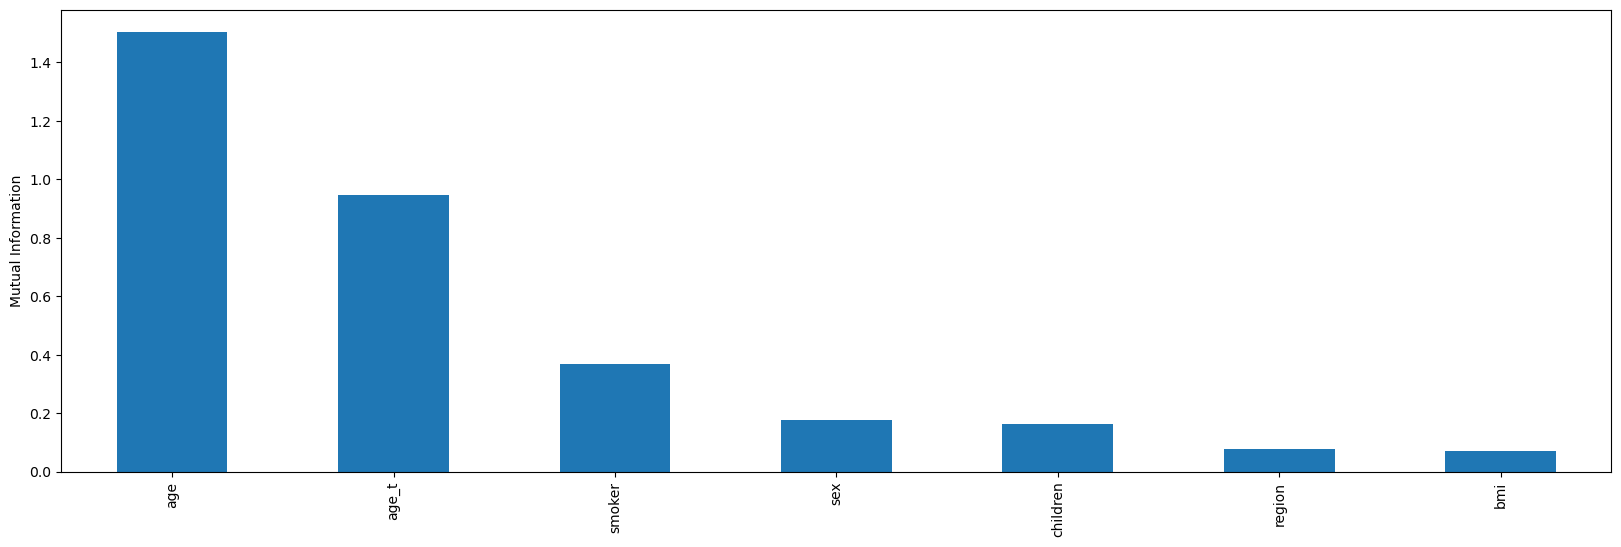

In [27]:
mi = mutual_info_regression(X, y)

# and make a bar  plot
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20,6))
plt.ylabel('Mutual Information')

It seems that none-transformed 'age' more predictive than discretised 'age_t' therefore none-transformed 'age will be used in  model develpoment.

In [28]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'age_t'],
      dtype='object')

# Features engineering

To prepare data for Model development, following transformation will be performed:
- log transform **target (charges)** variable
- Mapping categorical variables **('sex', 'smoker', 'region')**
- StandardScaler  **'age'** and *'BMI'** variable


In [29]:

data = pd.read_csv('insurance.csv')


# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['charges'], axis=1),  # drop the target
    data['charges'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape


((936, 6), (402, 6))

## Log Tranformation of target

In [30]:
y_train = np.log(y_train)
y_test = np.log(y_test)


## Mapping categorical variables



In [31]:
encoding_var = ['sex', 'smoker', 'region'] 
encoding_var

['sex', 'smoker', 'region']

In [32]:
X_train['sex'] = X_train['sex'].map({'female':0, 'male' :1})
X_test['sex'] = X_test['sex'].map({'female':0, 'male' :1})

In [33]:
X_train['smoker'] = X_train['smoker'].map({'no':0, 'yes' :1})
X_test['smoker'] = X_test['smoker'].map({'no':0, 'yes' :1})

In [34]:
X_train['region'] = X_train['region'].map({'northeast':0, 
                                           'southwest' :1,'southeast':2, 'northwest' :4})
X_test['region'] = X_test['region'].map({'northeast':0, 
                                           'southwest' :1,'southeast':2, 'northwest' :4})

In [35]:
X_test.head(2)

,age,sex,bmi,children,smoker,region
578,52,1,30.20,1,0,1
610,47,0,29.37,1,0,2


In [36]:
X_train.head(2)

,age,sex,bmi,children,smoker,region
1163,18,0,28.215,0,0,0
196,39,0,32.800,0,0,1


## Scaling

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


In [38]:
stand_scaler = StandardScaler()

In [39]:
# fitting
stand_scaler.fit(X_train)
X_train = stand_scaler.transform(X_train)
X_test = stand_scaler.transform(X_test)


In [40]:
stand_scaler.mean_

array([39.47115385,  0.48824786, 30.75236645,  1.08119658,  0.20299145,
        1.76388889])

# Model development

In [41]:
# will a number of models to the data and select best performance one.
lr = LinearRegression()
svm = SVR()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gbr = GradientBoostingRegressor(random_state=0)
ada = AdaBoostRegressor(random_state=0, n_estimators=100)
knn = KNeighborsRegressor(n_neighbors=5)
etr = ExtraTreesRegressor()


models = [lr,svm, dt,rf, etr,ada,gbr,knn]


## Fitting Models

In [42]:
# Dictionary to save models performance
r2_train = {}
r2_test = {}

for model in models:
    scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring='r2', 
                        cv=5,
                        return_train_score=True,) 
    r2_train[model] = np.mean(scores['train_score'])
    r2_test[model] = np.mean(scores['test_score'])


In [43]:
# Convert dic to dataframe
train = pd.DataFrame.from_dict(r2_train, orient='index',
                       columns=['r2_train'])

test = pd.DataFrame.from_dict(r2_test, orient='index',
                       columns=['r2_test'])


In [44]:
test = pd.DataFrame.from_dict(r2_test, orient='index',
                       columns=['r2_test'])


In [45]:
test = pd.DataFrame.from_dict(r2_test, orient='index',
                       columns=['r2_test'])

In [46]:
# merge test and train scores
scores = test.merge(train,left_index=True, right_index=True)
scores

,r2_test,r2_train
LinearRegression(),0.752181,0.762046
SVR(),0.817173,0.835690
DecisionTreeRegressor(),0.655149,0.997756
RandomForestRegressor(),0.785708,0.969649
ExtraTreesRegressor(),0.754030,0.997756
"AdaBoostRegressor(n_estimators=100, random_state=0)",0.725721,0.762688
GradientBoostingRegressor(random_state=0),0.816352,0.897359
KNeighborsRegressor(),0.775979,0.853883


From the results obtained from different models, GradientBoostingRegressor and SVR have highest r2. Will Choose GradientBoostingRegressor and do Hyper-Parameters optimization.

In [47]:
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint as sp_randInt


param_distributions = {
    "n_estimators": sp_randInt(1, 100),
    "max_leaf_nodes": [2, 3,5, 10, 20,30],
    "learning_rate": uniform(0.01, 1),
}


model_gbr = RandomizedSearchCV(
    GradientBoostingRegressor(), param_distributions=param_distributions,
    scoring="r2", n_iter=20, random_state=0, n_jobs=4, refit=True,
)

model_gbr.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(), n_iter=20, n_jobs=4,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x15411ff10>,
                                        'max_leaf_nodes': [2, 3, 5, 10, 20, 30],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15416a740>},
                   random_state=0, scoring='r2')

In [48]:
model_gbr.best_params_

{'learning_rate': 0.0971292997015407, 'max_leaf_nodes': 10, 'n_estimators': 81}

In [49]:
model_gbr.best_score_

0.8215634509256902

## Model Evaluation
### Evaluate our predicted vs  true values

Text(0.5, 1.0, 'Evaluation of GradientBoostingRegressor Predictions')

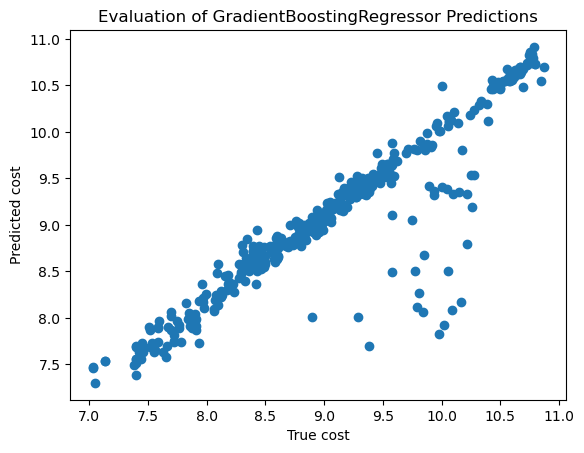

In [50]:
plt.scatter(y_test, model_gbr.predict(X_test))
plt.xlabel('True cost')
plt.ylabel('Predicted cost')
plt.title('Evaluation of GradientBoostingRegressor Predictions')

### Evaluate the Distribution of the errors

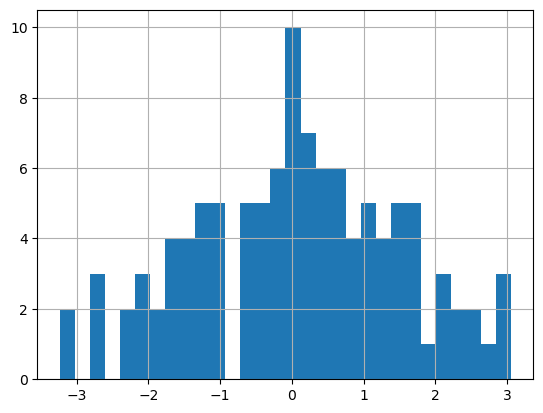

In [51]:
# Errors should be normally distributed


preds = pd.Series(model_gbr.predict(X_test))

errors = y_test - preds
errors.hist(bins=30)
plt.show()

## Storing the final model

In [52]:
import pickle
## Saving model to disk
pickle.dump(model_gbr, open('model_final.pkl','wb'))


In [53]:
model=pickle.load(open('model_final.pkl','rb'))


In [54]:
# load and make prediction
np.exp(model.predict([X_train[0]]))

array([2861.06466563])

In [55]:
## Saving children to disk
pickle.dump(stand_scaler, open('stand_scaler.pkl','wb'))
